## **Why**

Because calculating derative of chains is very difficult.

Because for a simple chain rule of derivation we have to perform various mathematical operations.

So in neural networks while doing backward propogation to calculate the **loss with respect to Parameters**

Because loss is depent on the predicted value, Predicted value is depend on the weight and bias, weight and bias is depend on the input. So in order to find loss w.r.t to weight and loss w.r.t biass is quite Tough

**The Basic Process of Training the Neural Network Includes**

1. **Forward pass** - Compute the output of the network given an input.

2. **Calculate loss** - Calculate the loss function to quantify the error.

3. **Backward pass** - Compute gradients of the loss with respect to the
parameters.

4. **Update gradients** - Adjust the parameters using an optimization
algorithm (e.g., gradient descent).

> Thus AutoGrad comes in Picture. It is a feature in Pytorch which helps to Calculate the Derivates Automatically.

# **AutoGrad**

Autograd is a core component of PyTorch that provides automatic differentiation for tensor operations.

It enables gradient computation, which is essential for training machine learning
models using optimization algorithms like gradient descent.

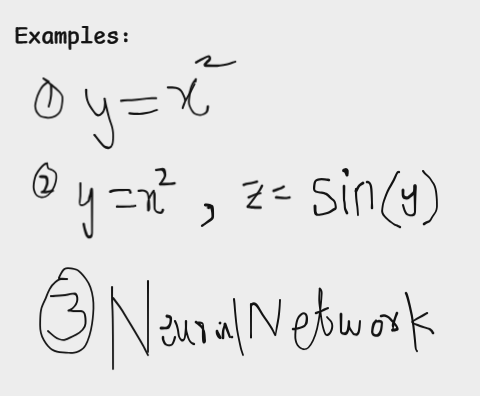

## **For 1st**

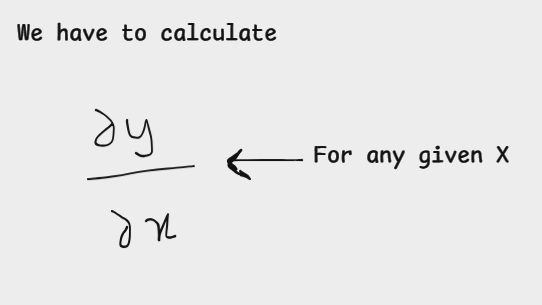

In [1]:
import torch

**Define a Tensor with Required_Grad Attribute.**

In [2]:
x = torch.tensor(3.0, requires_grad=True)

In [3]:
x

tensor(3., requires_grad=True)

In [4]:
# Define the Relation of y and x

y = x**2

In [5]:
y

tensor(9., grad_fn=<PowBackward0>)

Why we have this `PowBackward` in Y??

Because when we define `required_grad=True` PyTorch makes a Dynamic Computation Graph. These Graphs are **Directed Acyclic Graph**

In This computation Graph it defines the relationship of x and y connected through the mathematical function. So it has something like
- moving forward from x to y, y can be calculated as power of 2 on x
- moving backward from y to x, x can be calculated as power of 1/2 on y.

Thus PowBackward

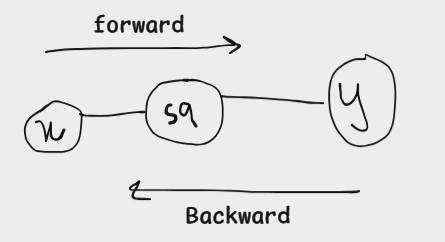

**Now calculate the Derivative**

For this square function our derivate will be `2x`

Just run the command backward on Y to calculate `dy/dx`.

If we needed to find `dx/dy` we would run backward on x given that the relationship is satisfying.

In [8]:
# check the derivative

x.grad

This is none because we haven't calculated the derivate yet

In [9]:
# This wont work because it is not a Leaf / Node
y.grad

/tmp/ipython-input-486760323.py:1: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at /pytorch/build/aten/src/ATen/core/TensorBody.h:489.)
  y.grad


In [10]:
# calculating the derivative
y.backward()

In [11]:
# Now check the Grad
x.grad

tensor(6.)

## **For 2nd**

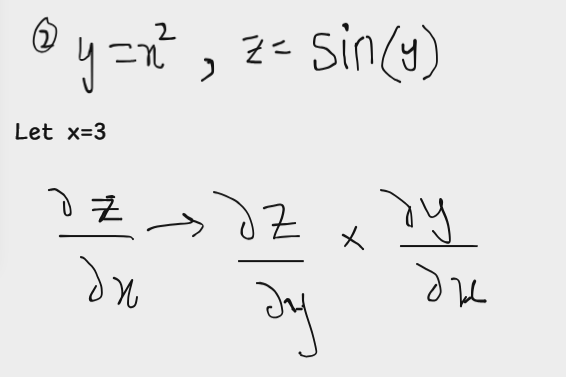

In [12]:
x = torch.tensor(3.0, requires_grad=True)

In [13]:
y = x**2

In [14]:
z = torch.sin(y)

In [15]:
print(x)
print('='*60)
print(y)
print('='*60)
print(z)

tensor(3., requires_grad=True)
tensor(9., grad_fn=<PowBackward0>)
tensor(0.4121, grad_fn=<SinBackward0>)


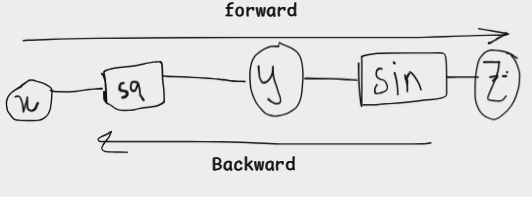

We simply need to Run Backward on Z.

In [16]:
x.grad

In [17]:
z.backward()

In [19]:
x.grad

tensor(-5.4668)

In [21]:
# Now if we need to check intermediate gradient i.e dy/dx it is not done by default but we can do that and we will see this in Future.

y.grad

/tmp/ipython-input-1468008201.py:3: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at /pytorch/build/aten/src/ATen/core/TensorBody.h:489.)
  y.grad


**Because We start from Root Node and End at Input**

## **For 3rd Neural Network**

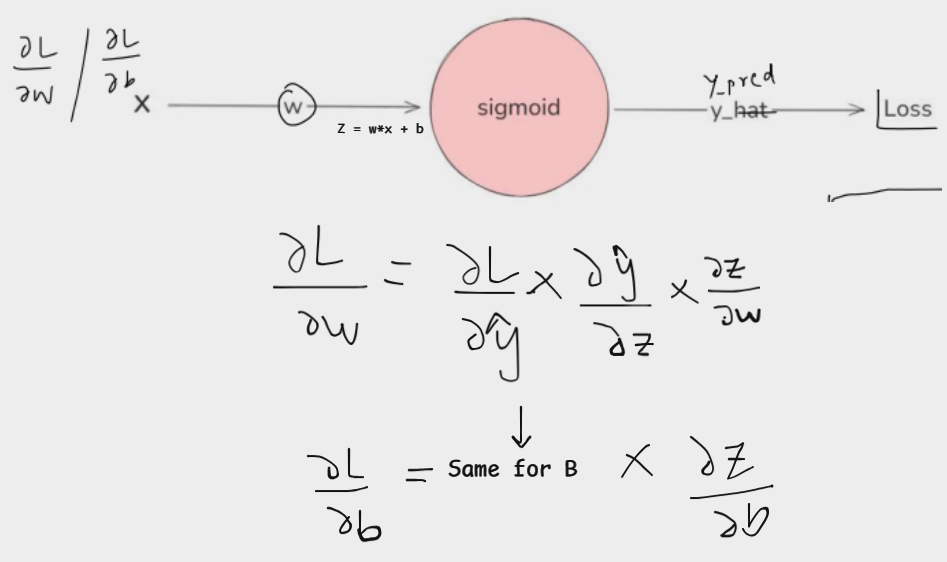

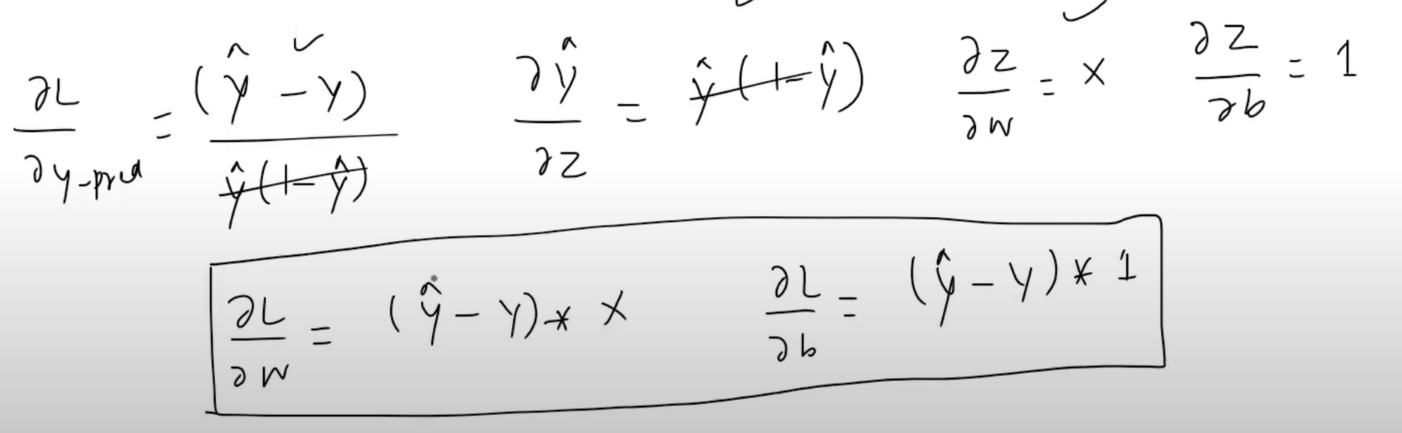

## Without AutoGrad

In [22]:
# Inputs
x = torch.tensor(6.7)  # Input feature
y = torch.tensor(0.0)  # True label (binary)

# Start Weight & Bias with Random
w = torch.tensor(1.0)  # Weight
b = torch.tensor(0.0)  # Bias

In [23]:
# Function to Calculate the Binary Cross Entropy
# Binary Cross-Entropy Loss for scalar
def binary_cross_entropy_loss(prediction, target):
  epsilon = 1e-8  # To prevent log(0)
  prediction = torch.clamp(prediction, epsilon, 1 - epsilon)
  return -(target * torch.log(prediction) + (1 - target) * torch.log(1 - prediction))

**Perform Forward Pass**

In [24]:
# Weigted Sum
z = w*x + b #linear algebra

In [25]:
# predict the y through sigmoid
# Predicted Probabily
y_pred = torch.sigmoid(z)

In [26]:
# Calculate the loss
loss = binary_cross_entropy_loss(y_pred, y)

In [27]:
loss

tensor(6.7012)

**Back Propogration (Derivates)**

In [28]:
# Derivatives:
# 1. dL/d(y_pred): Loss with respect to the prediction (y_pred)
dloss_dy_pred = (y_pred - y)/(y_pred*(1-y_pred))

# 2. dy_pred/dz: Prediction (y_pred) with respect to z (sigmoid derivative)
dy_pred_dz = y_pred * (1 - y_pred)

# 3. dz/dw and dz/db: z with respect to w and b
dz_dw = x  # dz/dw = x
dz_db = 1  # dz/db = 1 (bias contributes directly to z)

# Final Derivative
dL_dw = dloss_dy_pred * dy_pred_dz * dz_dw
dL_db = dloss_dy_pred * dy_pred_dz * dz_db

In [29]:
print(f"Manual Gradient of loss w.r.t weight (dw): {dL_dw}")
print(f"Manual Gradient of loss w.r.t bias (db): {dL_db}")

Manual Gradient of loss w.r.t weight (dw): 6.691762447357178
Manual Gradient of loss w.r.t bias (db): 0.998770534992218


## With AutoGrad

In [30]:
x = torch.tensor(6.7)
y = torch.tensor(0.0)

We are not passing `requires_grad=True` Because we are calculating derivatives with respect to weight & bias not x and y.

In [31]:
# With Grad

w = torch.tensor(1.0, requires_grad=True)
b = torch.tensor(0.0, requires_grad=True)

In [32]:
w

tensor(1., requires_grad=True)

In [33]:
b

tensor(0., requires_grad=True)

In [35]:
z = x * w + b

z

tensor(6.7000, grad_fn=<AddBackward0>)

In [36]:
# Sigmoid -> Prediction
y_pred = torch.sigmoid(z)

y_pred

tensor(0.9988, grad_fn=<SigmoidBackward0>)

In [37]:
loss = binary_cross_entropy_loss(y_pred, y)

loss

tensor(6.7012, grad_fn=<NegBackward0>)

**This is the Current Graph**

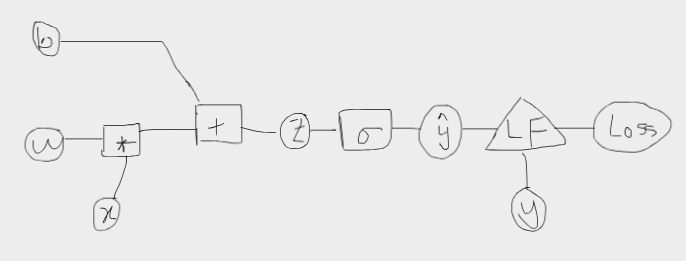

In [38]:
# Perform Derivative

loss.backward()

In [39]:
w.grad

tensor(6.6918)

In [40]:
b.grad

tensor(0.9988)

In [41]:
print(f"AutoGrad Gradient of loss w.r.t weight (dw): {w.grad}")
print(f"AutoGrad Gradient of loss w.r.t bias (db): {b.grad}")

AutoGrad Gradient of loss w.r.t weight (dw): 6.6917619705200195
AutoGrad Gradient of loss w.r.t bias (db): 0.9987704753875732


## **Working with Tensors Because till now we only saw this with scalar**

In [42]:
x = torch.tensor([2.0,2.0,3.0], requires_grad=True)

In [43]:
x

tensor([2., 2., 3.], requires_grad=True)

In [44]:
y = (x**2).mean()
y

tensor(5.6667, grad_fn=<MeanBackward0>)

In [45]:
y.backward()

In [46]:
x.grad

tensor([1.3333, 1.3333, 2.0000])

Why we are getting three gradients here??

Because when we are passing tensor we are making multiple variable so partial differenciation concept is used.

We have 3 values so x1, x2, x3
- dy/dx1 => Only calc derivate for x1 and rest will be zero
- dy/dx2 => Only calc derivate for x2 and rest will be zero
- dy/dx3 => Only calc derivate for x3 and rest will be zero


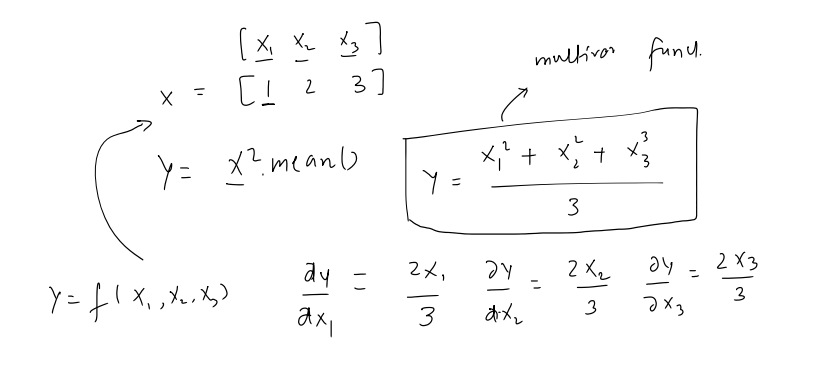

## **Clearing Grad**

Why we need to Clear.

Because If we run it again and again all gradients will get accumulated rather than replacing.

Previous Gradient gets added to current Gradient.

In [47]:
x = torch.tensor(2.0, requires_grad=True)

In [48]:
y = x** 3

In [49]:
y

tensor(8., grad_fn=<PowBackward0>)

In [50]:
# Calc Derivate
y.backward()

In [51]:
x.grad

tensor(12.)

In [54]:
# Now if we run again the forward pass
y = x**3
y.backward()

In [55]:
x.grad

tensor(24.)

See we get the value from previous and current Grad.

(12 + 12)

This is not a right thing.

**We can simply fix this by clearing the gradient i.e making it zero with `inplace`**

In [56]:
# Lets test

x.grad.zero_()

tensor(0.)

In [57]:
# Now if we run again the forward pass
y = x**3
y.backward()

In [58]:
x.grad

tensor(12.)

This is Fixed

## **How to Disable gradient Tracking**

When it is usefull.

- After training when only doing Predictions. Because at training we need backward pass while prediction we dont need backward pass.

- requires_grad => False
- detach()
- torch.no_grad()


**with `requires_grad=False`**

In [59]:
a = torch.tensor(2.0, requires_grad=True)

In [63]:
a

tensor(2., requires_grad=True)

In [60]:
b = a ** 2

In [61]:
b.backward()

In [62]:
a.grad

tensor(4.)

In [64]:
# Disable Tracing on a

a.requires_grad_(False)

tensor(2.)

In [65]:
b = a ** 2

In [66]:
# This will give error because now no gradient tracking is there
b.backward()

RuntimeError: element 0 of tensors does not require grad and does not have a grad_fn

In [67]:
a.grad

tensor(4.)

Why we are seeing this is because While requires_grad=False prevents new operations from tracking gradients for that specific tensor, previous operations in the computation graph that do require gradients can still flow through x to lower layers. To truly disable gradient calculation and prevent .grad updates, especially during inference, use the torch.no_grad() context manager, which temporarily disables gradient tracking for all tensors within its scope

**with `detach()`**

In this we create a completely new tensor from existing tensor.

This is done by calling detach method on tensor.

In [68]:
a = torch.tensor(2.0, requires_grad=True)

In [69]:
a

tensor(2., requires_grad=True)

In [70]:
a_without_grad = a.detach()

In [71]:
a_without_grad

tensor(2.)

In [72]:
b = a ** 2

In [73]:
b

tensor(4., grad_fn=<PowBackward0>)

In [74]:
b.backward()

In [75]:
a.grad

tensor(4.)

In [76]:
b_without_grad = a_without_grad ** 2

In [77]:
b_without_grad

tensor(4.)

In [78]:
b_without_grad.backward()

RuntimeError: element 0 of tensors does not require grad and does not have a grad_fn

**With `torch.no_grad()`**

This is the most convinient

In [79]:
a = torch.tensor(2.0, requires_grad=True)

In [80]:
a

tensor(2., requires_grad=True)

In [81]:
# Use a no grad to make relation/calculate other variable

with torch.no_grad():
  b = a ** 2

In [82]:
b

tensor(4.)

In [83]:
b.backward()

RuntimeError: element 0 of tensors does not require grad and does not have a grad_fn